In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [3]:
import json
from operator import itemgetter

owdata = []

def get_data( index ) :
    
    with open('data{}_{}.json'.format( index*50, index*50+50 )) as data_file:    
        data = json.load( data_file )

    for player in data:
        for server in player:

            if server in ['eu', 'us', 'kr'] and player[server] and player[server]['stats']['competitive'] and player[server]['stats']['competitive']['overall_stats']['comprank'] and player[server]['stats']['competitive']['overall_stats']['comprank'] > 1000 and player[server]['stats']['competitive']['overall_stats']['win_rate'] > 10:

                owdata.append( (player[server]['stats']['competitive']['overall_stats']['comprank'],
                                player[server]['stats']['competitive']['overall_stats']['win_rate']) )
            
for i in range(10):
    get_data( i )
    
print( len(owdata) )

902


In [18]:
# x
win_rates = np.array( sorted( [ [d[1]] for d in owdata ] ) )
#  y
skill_ratings = np.array( sorted( [ [d[0]] for d in owdata ] ) )

In [35]:
win_rates_2 = np.hstack([win_rates, win_rates**2, win_rates**3, win_rates**4])

In [36]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit( win_rates_2, skill_ratings )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(win_rates_2) - skill_ratings) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(win_rates_2, skill_ratings))

Coefficients: 
 [[  2.52228367e+03  -4.76198064e+01   3.95229850e-01  -1.21397957e-03]]
Mean squared error: 2749.14
Variance score: 0.94


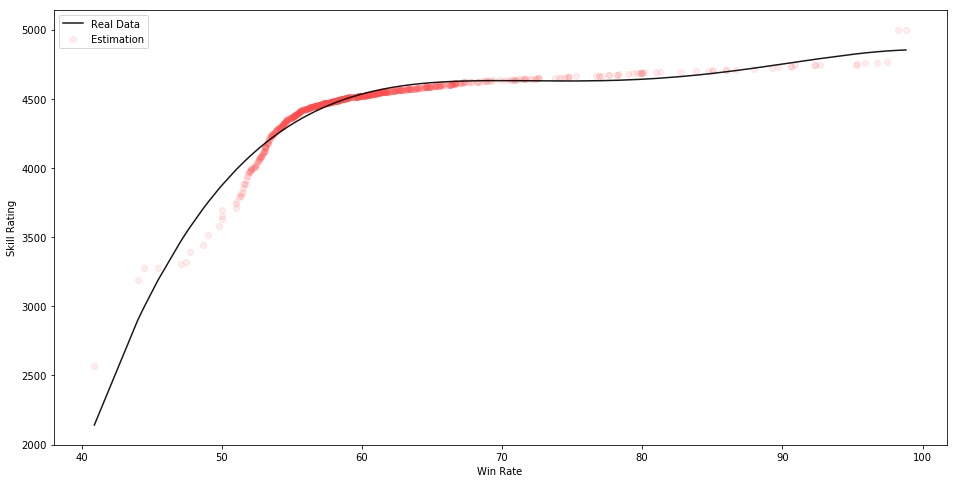

In [43]:
# Plot outputs
# fig, ax = plt.subplots()

plt.figure( figsize=(16,8) )
plt.scatter( win_rates, skill_ratings, c=[1,0.3,0.3,0.1] )
plt.plot( win_rates_2[:,0], regr.predict(win_rates_2), c=[0,0,0,0.9], linewidth=1.5)
plt.legend(['Real Data', 'Estimation'])

plt.xlabel('Win Rate')
plt.ylabel('Skill Rating')

plt.show()